# Data retrieval European Central Bank - Bank Interest Rates 
Bank interest rates - new business

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline


import requests     # 2.18.4
import pandas as pd # 0.23.0
pd.options.display.max_columns = None
import io
from src.visualization import visualize

In [ ]:

DATAFLOW = "MIR"
FREQ = "M"
REF_AREA = "NL"
SECTOR = 'B'
BALANCE_ITEM = 'A2CC'
MATURITY = "F+I+O+P"
DATA_TYPE = 'R'
AMOUNT_CAT = 'A'
COUNTERPARTY_SECTOR = '2250'
CURRENCY = 'EUR'
COVERAGE = 'N'
KEY = ( f'{DATAFLOW}/{FREQ}.{REF_AREA}.{SECTOR}.{BALANCE_ITEM}.'
        f'{MATURITY}.{DATA_TYPE}.{AMOUNT_CAT}.'
        f'{COUNTERPARTY_SECTOR}.{CURRENCY}.{COVERAGE}')

start_period = '2003-01-01'
end_period = '2023-01-31'
parameters = {
    "startPeriod": start_period,
    "endPeriod": end_period,
}
url = (
    f"https://sdw-wsrest.ecb.europa.eu/service/data/"
    f"{KEY}"
)
response = requests.get(url, params=parameters,headers={"Accept": "text/csv"})
# Check if the response returns succesfully with response code 200
print(response)

# Print the full URL
print(response.url)

In [ ]:
# Read the response as a file into a Pandas DataFrame
df = pd.read_csv(io.StringIO(response.text))

In [ ]:
# Check the DataFrame's information
df.info()

In [ ]:
df['fixed_period'] = df['KEY'].map({    
    'MIR.M.NL.B.A2CC.F.R.A.2250.EUR.N' : '<= 1 year',
    'MIR.M.NL.B.A2CC.I.R.A.2250.EUR.N' : '1>5 years',    
    'MIR.M.NL.B.A2CC.O.R.A.2250.EUR.N' : '5>10 years',
    'MIR.M.NL.B.A2CC.P.R.A.2250.EUR.N' : '>10 years',
})

In [ ]:
# Show the last 5 entries of the DataFrame
df.tail()

In [ ]:
# Create a new DataFrame called 'ts'
ts = df.filter(['TIME_PERIOD', 'fixed_period', 'OBS_VALUE'], axis=1)
# 'TIME_PERIOD' was of type 'object' (as seen in df.info). Convert it to datetime first
ts['TIME_PERIOD'] = pd.to_datetime(ts['TIME_PERIOD'])
# Set 'TIME_PERIOD' to be the index
ts = ts.set_index('TIME_PERIOD')
# Print the last 5 rows to screen
ts.tail()

In [ ]:
%matplotlib inline
visualize.lineplot(
    ts, 
    x = ts.index, 
    y = 'OBS_VALUE',
    x_label = 'Period',
    y_label = 'Interest %',  
    hue = 'fixed_period',       
    title="Loans to households for house purchase with collateral (new business) - Netherlands" );

In [2]:
%autoreload 2
%aimport src.data

from src.data import dataset

2023-03-11 16:14:27.720 | INFO     | src.data.dataset:read_data:58 - reading interest data from ESW.


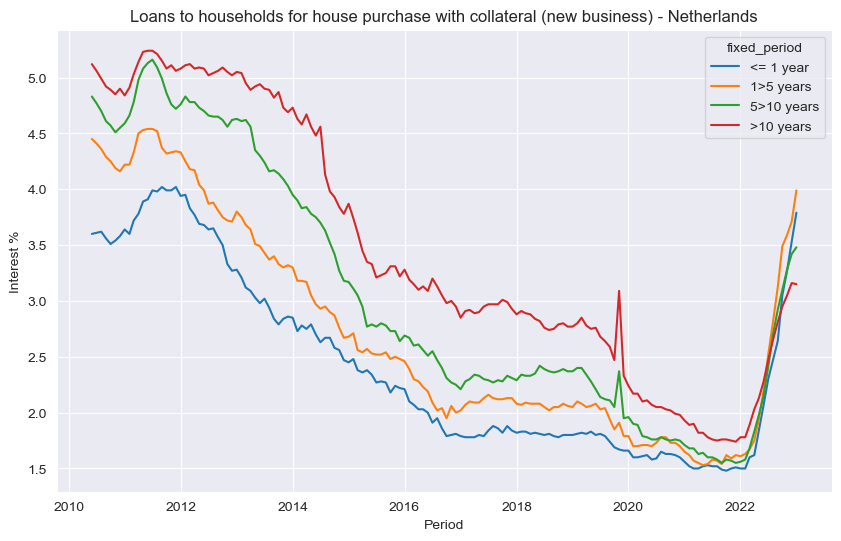

In [7]:
interest = dataset.Interest()
interest.read_data()
interest.lineplot()


2023-03-11 16:10:21.905 | INFO     | src.data.dataset:read_data:118 - reading zero curve data from ESW.


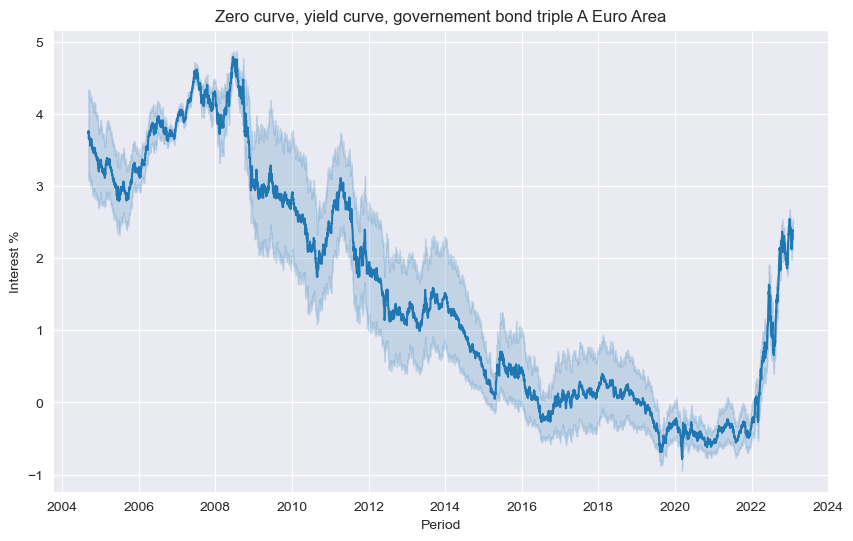

In [6]:
zerocurve = dataset.Zerocurve()
zerocurve.read_data()
zerocurve.lineplot()

2023-03-11 16:16:29.209 | INFO     | src.data.dataset:read_data:182 - reading inflation data from ESW.


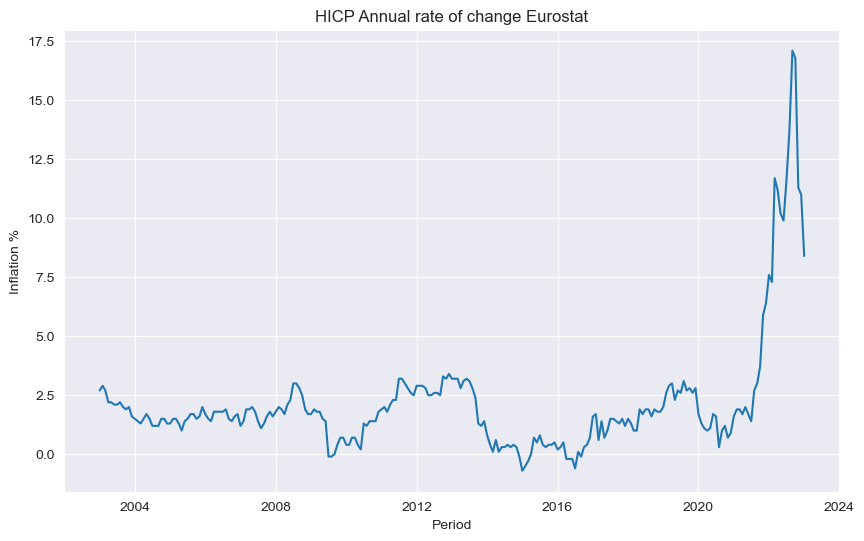

In [9]:
inflation = dataset.Inflation()
inflation.read_data()
inflation.lineplot()